### Numpy basics

In [2]:
import numpy as np

1\. Find the rows, columns and overall mean for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
m = np.arange(12).reshape((3,4))
print("m rows:")
for i in range(3):
    print(m[i, :])  # Print the i-th row
print()
print("m columns:")
for i in range(4):
    print(m[:, i])  # Print the i-th column
print()
print("overall mean:", m.mean())
print("overall mean equivalently:", np.mean(m))


m rows:
[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]

m columns:
[0 4 8]
[1 5 9]
[ 2  6 10]
[ 3  7 11]

overall mean: 5.5
overall mean equivalently: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [4]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#Outer product with outer function - if u,v are n,m long vectors, the result is an m x n matrix which entries are 
#m[i,j] = a[i]*b[j]
print(np.outer(u,v))
print()

#Outer product with a nested for loop 
m = np.ndarray([len(u),len(v)], 'uint32') #If I don't force the array's entries to be integers I get floating numbers
for i in range (len(u)): 
    for j in range (len(v)):
        m[i,j] = v[i]*u[j]
print(m)
print()

#Outer product with list comprehension
q = [[u[i] * v[j] for j in range(len(v))] for i in range(len(u))]
q = np.array(q)
print(q)
print()

#Outer product with numpy broadcasting operations
#NOTICE: basically what happens in the outer product is that each column is multiplied by a line's entry
first_element = np.tile(v,4).reshape(4,4)
print(first_element)
out_prod = u[:, None] * first_element #converts u from shape (4,) to (4, 1) (a column vector). Otherwise you have each row of first_element's entry multiplied respectively by u's entries.
#See notes below
print()
print(u[:,None])
#This allows u to be broadcast across the columns of first_element, and you'll get the expected result.
print()
print(out_prod)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

[[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]]

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

[[2 4 6 8]
 [2 4 6 8]
 [2 4 6 8]
 [2 4 6 8]]

[[1]
 [3]
 [5]
 [7]]

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In broadcasting, NumPy tries to align the shapes of the arrays in a way that allows element-wise operations. However, broadcasting works in the following way:

If one of the arrays is 1D (like u), NumPy can extend it across the second dimension (the columns of first_element).
But it only works when the number of rows or the shape of the first dimension is the same or one of them is 1.

3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [5]:
import numpy.random as npr

#Create the matrix of random uniform numbers
matrix = npr.random((10,6)) 
print("matrix:", matrix, '\n')

#Set all rows with an entry less than 0.1 to be zero
mask = (matrix <0.1)
print("the mask:", mask,'\n')
matrix[mask] = 0
print("the matrix now:", matrix, '\n') #Notice that by doing this I've modified matrix itself

#In order to create a new matrix with zeros instead of numbers smaller than 0.1 I should have created a copy
new_matrix = npr.random((10,6))

mask = (new_matrix < 0.1)
mat_copy = np.copy(new_matrix)
mat_copy[mask] = 0
print("new_matrix:", new_matrix, '\n')
print("new_matrix corrected copy:",mat_copy)

matrix: [[0.27803157 0.83422488 0.35139978 0.09099002 0.64867874 0.85329296]
 [0.26864806 0.09939084 0.86691518 0.97059997 0.64582177 0.2874749 ]
 [0.08138651 0.11506267 0.96842755 0.91568353 0.68227283 0.54647166]
 [0.14076361 0.5600232  0.58292675 0.59033883 0.41506131 0.160776  ]
 [0.57783894 0.67108831 0.96239141 0.9924783  0.7937345  0.56122847]
 [0.21875022 0.66041535 0.13560308 0.61017904 0.51593654 0.38936523]
 [0.71198059 0.83141673 0.06033595 0.09391611 0.56986109 0.65506167]
 [0.06890694 0.69743639 0.57221937 0.78615167 0.12792206 0.914624  ]
 [0.57376287 0.0048086  0.97706873 0.03154536 0.58645016 0.9085958 ]
 [0.94164743 0.99198094 0.66666686 0.4759125  0.24190487 0.43707052]] 

the mask: [[False False False  True False False]
 [False  True False False False False]
 [ True False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False  True  True False False]
 [ True False Fa

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (inclusive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

array: [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5

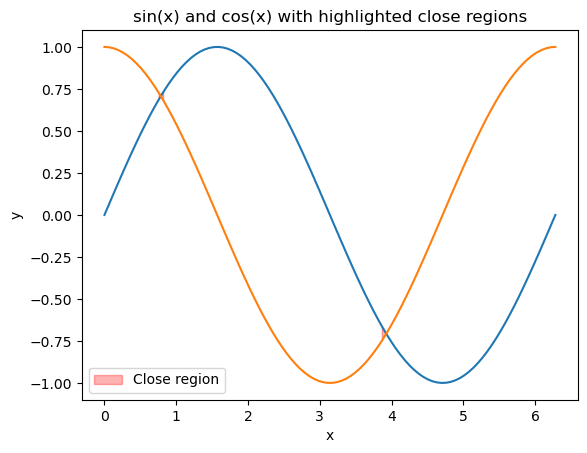

In [6]:
array = np.linspace(0,2*np.pi, 100)
print("array:", array, '\n')

#Extract every 10th element using slice notation
everyten = array[::10] #notation start, stop, step (start is empty (defaults to the beginning of the array).
                       #stop is empty (defaults to the end of the array).
                       #step=10 specifies that you want every 10th element from the array)
print("every 10th element:", everyten, '\n')

#Reverse the array using slice notation
reverse = array[::-1] #giving a -1 step gives the array viewed reversly
print("reversed array:", reverse, '\n')

#Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
#sine_values = np.sin(array)
#cosine_values = np.cos(array)

# Extract the elements where the absolute difference is less than 0.1
filtered_elements = array[(np.abs(np.sin(array) - np.cos(array))) < 0.1]
print("Elements where the absolute difference between sine and cosine is less than 0.1:", filtered_elements, '\n')

#Make a plot showing the sin and cos functions and indicate where they are close
import matplotlib.pyplot as plt

# Define the threshold for "closeness"
threshold = 0.1
close_points = np.abs(np.sin(array) - np.cos(array)) < threshold

plt.plot(array,np.sin(array))
plt.plot(array,np.cos(array))
plt.fill_between(array,np.sin(array), np.cos(array), where=close_points, color='red', alpha=0.3, label="Close region")

# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("sin(x) and cos(x) with highlighted close regions")

# Show the plot
plt.show()

The `plt.fill_between` function in Matplotlib fills the area between two curves (or a curve and a baseline) along the x-axis. Let's break down each part of the command:

```python
plt.fill_between(x, sin_x, cos_x, where=close_points, color='gray', alpha=0.3, label="Close region")
```

### Parameters:

1. **`x`**: The x-coordinates over which to fill. In this case, it's the range of values we generated from \(0\) to \(2\pi\).

2. **`sin_x`**: The y-values for the first curve, here representing \( \sin(x) \).

3. **`cos_x`**: The y-values for the second curve, here representing \( \cos(x) \). The function will fill the area between \( \sin(x) \) and \( \cos(x) \).

4. **`where=close_points`**: This is a boolean array (same length as `x`) that specifies the regions to fill. If `close_points[i]` is `True`, `fill_between` will fill the area between `sin_x` and `cos_x` at that `x[i]` value. In our case, `close_points` marks points where the difference between `sin(x)` and `cos(x)` is below the threshold (0.1). 

5. **`color='gray'`**: Sets the color of the filled region.

6. **`alpha=0.3`**: Adjusts the transparency of the filled region. Values range from 0 (fully transparent) to 1 (fully opaque). Here, `alpha=0.3` makes the shaded region semi-transparent.

7. **`label="Close region"`**: Provides a label for the filled region, which will be used in the legend.

### Summary:

`plt.fill_between` fills the area between `sin_x` and `cos_x` only where the `where` condition (`close_points`) is `True`. The result is a shaded area highlighting where the two functions are "close" to each other, as per our threshold.

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```): is the diagonal that runs from the top-right corner to the bottom-left corner of the matrix.
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

numpy.diagonal(a, offset=0, axis1=0, axis2=1)
Return specified diagonals.

If a is 2-D, returns the diagonal of a with the given offset, i.e., the collection of elements of the form a[i, i+offset]. If a has more than two dimensions, then the axes specified by axis1 and axis2 are used to determine the 2-D sub-array whose diagonal is returned. The shape of the resulting array can be determined by removing axis1 and axis2 and appending an index to the right equal to the size of the resulting diagonals.

In [7]:
#Create the matrix that show the 10 by 10 multiplication table
table = np.arange(1,11)
table = np.outer(table,table)
print("multiplication table:", table, '\n')

#Extract the anti-diagonal

#Less efficient way of doing it
#anti_diagonal = np.array(10)  --> this does not work! It creates an array of one single value which is 10
anti_diagonal = np.empty(10, dtype=int) #has 10 entries indexed as 0,...,9
for i in range(0,10): #for index 0,...,9
    anti_diagonal[i] = table[i,9-i] #for example at first cycle take the element of row = 0, column = 9
print("anti_diagonal", anti_diagonal, '\n')

#More direct way of doing the same thing
#fliplr (flips left right the columns while keeping rows fixed --> this makes the anti-diagonal the principal diagonal)
#np.diag(...): Extracts the main diagonal 
anti_diagonal2 = np.diag(np.fliplr(table)) 
print("direct anti_diagonal", anti_diagonal2, '\n')

#Extract the diagonal offset by 1 upwards (offset = deviazione)
diag_1u = np.diagonal(table, 1)
print("diagonal with offset by 1 upwards:", diag_1u)

multiplication table: [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] 

anti_diagonal [10 18 24 28 30 30 28 24 18 10] 

direct anti_diagonal [10 18 24 28 30 30 28 24 18 10] 

diagonal with offset by 1 upwards: [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [8]:
#Define city's positions along rout 66
cities = ["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", 
          "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "L.A"]
positions = [0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]
city_positions = dict(zip(cities, positions)) #zip(cities, positions): Pairs each city with its position, resulting in tuples like ("Chicago", 0), ("Springfield", 198), and so on.
                                                #dict(...): Converts the list of tuples into a dictionary, where each city is a key, and the corresponding position is the value.

#Create, using broadcasting, a grid of distances among each city
#For example: first line contains all distances minus the first one, second all distances minus the second and so on...
"""pos = np.array(positions)
pos_lines = np.tile(pos,len(pos)).reshape(len(pos),len(pos))
sub_pos = pos[:,None]
#print(pos_lines)
#print(sub_pos)
distances = abs(pos_lines - sub_pos)"""
#More efficient way of doing this is by taking advantage of NumPy's broadcasting directly without needing np.tile.
distances = np.abs(pos - pos[:, None])# pos[:, None]: This reshapes pos to a column vector (10, 1) so that it can be broadcast against pos (1, 10), allowing element-wise subtraction across rows and columns.
print("table of distances bewteen cities:", '\n',distances, '\n')

#Covert into km (1 mile = 1.609344 km)
km_dist = 1.609344 * distances
print("table in km:", '\n', km_dist, '\n')

# Print the table with labels
print("Distance Table (in km):\n")

km_dist = 1.6 * distances

# Print header row
print(f"{'':<12}", end="")  # Empty corner for alignment
for city in cities:
    print(f"{city:<12}", end="")
print()  # New line after header row

# Print each row with labels
for i, city in enumerate(cities):
    print(f"{city:<12}", end="")  # Row label
    for distance in km_dist[i]:
        print(f"{distance:<12.2f}", end="")  # Distance formatted to 2 decimal places
    print()  # New line after each row


NameError: name 'pos' is not defined

#### Here's how the broadcasting works
1. Understanding the Original Array Shape
The array `pos` is a 1-dimensional array with 10 elements, representing the positions of cities along Route 66:

```python
pos = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
# Shape: (10,)
```

2. Reshaping with `pos[:, None]`
When we do `pos[:, None]`, we reshape `pos` from a 1-dimensional array of shape `(10,)` to a 2-dimensional column vector of shape `(10, 1)`:

```python
pos[:, None]
# Result:
# array([[   0],
#        [ 198],
#        [ 303],
#        [ 736],
#        [ 871],
#        [1175],
#        [1475],
#        [1544],
#        [1913],
#        [2448]])
# Shape: (10, 1)
```

In this new shape, each position is now in its own row. 

3. Broadcasting for Element-Wise Subtraction
Now, when we subtract `pos[:, None]` (shape `(10, 1)`) from `pos` (shape `(10,)`), NumPy’s broadcasting rules apply. Broadcasting allows NumPy to automatically expand arrays with smaller dimensions to match larger ones for element-wise operations.

4. Broadcasting Rules
For two arrays to be compatible for element-wise operations, their shapes must either be:
1. **Equal** in each dimension, or
2. **One of the shapes must be 1** for a dimension where the other shape has a larger size.

Here’s how broadcasting applies in our case:

- `pos[:, None]` has shape `(10, 1)` — 10 rows, 1 column.
- `pos` has shape `(10,)`, which NumPy interprets as `(1, 10)` — 1 row, 10 columns.

When we subtract them:
- `pos[:, None]` expands from `(10, 1)` to `(10, 10)`.
- `pos` expands from `(1, 10)` to `(10, 10)`.

So, the broadcasting effectively "stretches" both arrays to match a shape of `(10, 10)`, allowing an element-wise subtraction.

5. Result of the Subtraction
After broadcasting, each element in `pos[:, None]` (which is a specific city position) is subtracted from every element in `pos` (the list of all city positions). The resulting `(10, 10)` array contains the pairwise distances between every pair of cities.

For instance:
- Row 1 in the result gives distances from Chicago (position 0) to all other cities.
- Row 2 gives distances from Springfield (position 198) to all other cities, and so on.


#### Here's how the manual formatting of the table works
 1. Print the Table Title
```python
print("Distance Table (in km):\n")
```
This prints a title to label the table as a distance table with units in kilometers. The `\n` at the end adds a blank line after the title for visual spacing.

 2. Print the Header Row
```python
print(f"{'':<15}", end="")  # Empty corner for alignment
for city in cities:
    print(f"{city:<15}", end="")
print()  # New line after header row
```

This section constructs the header row, which includes an empty cell in the top-left corner (to align city labels) and the city names across the top.

- **`print(f"{'':<15}", end="")`**: This creates a blank space at the beginning of the row (since there's no city above the first column). The format specifier `:<15` means that it will left-align the text in a space of 15 characters.
- **`for city in cities:`**: This loop iterates through each city in the `cities` list.
- **`print(f"{city:<15}", end="")`**: This prints each city name left-aligned in a field of 15 characters. Setting `end=""` ensures that the names are printed on the same line, not separated by newlines.
- **`print()`**: After the loop finishes, a `print()` statement without any arguments adds a newline, moving to the next row in the table.

The result is a header row with city names, evenly spaced across the table width.

3. Print Each Row with Labels
```python
for i, city in enumerate(cities):
    print(f"{city:<15}", end="")  # Row label
    for distance in km_dist[i]:
        print(f"{distance:<15.2f}", end="")  # Distance formatted to 2 decimal places
    print()  # New line after each row
```

This section prints each row of the table, where:
- The first cell in each row is a city name (acting as a row label).
- The subsequent cells show the distances from that city to every other city.

Breaking Down the Row Loop:
1. **`for i, city in enumerate(cities):`**: This loop iterates over each city in `cities` while also keeping track of the index `i`.
   
2. **`print(f"{city:<15}", end="")`**: Prints the city name (acting as the row label) and left-aligns it in a field of 15 characters. Using `end=""` here keeps the row label and distances on the same line.

3. **Inner Loop (Printing Distances)**:
   - **`for distance in km_dist[i]:`**: For each city `i`, this loop iterates over its corresponding row of distances in `km_dist`.
   - **`print(f"{distance:<15.2f}", end="")`**: Prints each distance in the row left-aligned within a 15-character field, formatted to two decimal places (`.2f`). Using `end=""` again keeps the distances on the same line.
   
4. **`print()`**: After the inner loop completes for a row, a new `print()` statement adds a newline, moving to the next row.


#### However a more efficient way of doing the same would have been using Pandas

Yes, you can use **Pandas** to create a labeled table where both the rows and columns are labeled with city names. Here’s how you can do it:

1. Import the Pandas library.
2. Create a `DataFrame` using the `km_dist` array.
3. Set the `index` and `columns` of the DataFrame to the list of cities.

This will give you a clean table with city names as labels.

```python
import pandas as pd
import numpy as np

# Define city positions and calculate distances in km
cities = ["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", 
          "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "Los Angeles"]
positions = [0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448]
pos = np.array(positions)

# Calculate distance grid in km
distances = np.abs(pos - pos[:, None])
km_dist = 1.609344 * distances

# Convert to DataFrame with city labels
distance_df = pd.DataFrame(km_dist, index=cities, columns=cities)

print("Table of distances in km between cities:\n")
print(distance_df)
```

 #### Explanation

- **`pd.DataFrame(km_dist, index=cities, columns=cities)`**: Creates a labeled DataFrame where each row and column corresponds to a city. 
- **`index=cities`** and **`columns=cities`**: Assign city names as row and column labels, respectively, making the table easier to interpret.

 #### Example Output
Your output will look like this:

```plaintext
Table of distances in km between cities:

                   Chicago  Springfield  Saint-Louis  Tulsa  Oklahoma City  ...
Chicago              0.000      318.654      487.631   ... 
Springfield        318.654        0.000      169.101   ...  
Saint-Louis        487.631      169.101        0.000   ...  
Tulsa             1184.563      865.909      696.808   ...
Oklahoma City     1401.344     1082.690      913.589   ...
...
```

This approach makes the table much more readable and allows you to reference distances by city names directly.

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask: sieve = setaccio).
  * Construct a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [ ]:
import timeit

def sieve_of_eratosthenes(N):
    # Step 1: Create a boolean array "mask" with size N+1
    sieve = np.ones(N+1, dtype=bool) #Array of True: initially you assume all numbers to be prime
    sieve[0] = sieve[1] = False  # 0 and 1 are not prime

    # Step 2: Mark the multiples of each prime starting from 2
    for i in range(2, int(np.sqrt(N) + 1)):
        if sieve[i]:  # i is prime --> basically it's a shorter way of saying "if sieve[i] == True". Python knows to proceed only if True
            sieve[i*i:N+1:i] = False  # Mark all multiples of i as False. 
                   #Basically this says: start from the first multiple of i that's not i itself and go up to N+1 marking all the multiples of i (taking every ith element)
                   
    # Step 3: Extract the prime numbers from the mask
    primes = np.nonzero(sieve)[0]  # The indices of True values are primes: for a Boolean array True = 1, False = 0
    return primes

# Test the sieve with N=99
N = 99
primes = sieve_of_eratosthenes(N)
print("Primes up to", N, ":", primes)

# Performance testing with timeit
setup_code = "from __main__ import sieve_of_eratosthenes"
test_code = "sieve_of_eratosthenes(1000)"
execution_time = timeit.timeit(test_code, setup=setup_code, number=100)
#print(f"Execution time for N=1000: {execution_time:.6f} seconds")

# Test performance for different values of N
Ns = [10, 100, 1000, 10000, 100000]
times = []

# Measure execution time for each N
for N in Ns:
    setup_code = "from __main__ import sieve_of_eratosthenes"
    test_code = f"sieve_of_eratosthenes({N})"
    execution_time = timeit.timeit(test_code, setup=setup_code, number=10)  # Average over 10 runs
    times.append(execution_time)
    
print("Execution times for different N:", list(zip(Ns, times)))

# Plot the results
plt.plot(Ns, times, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('Time (log scale)')
plt.title('Sieve of Eratosthenes Performance')
plt.grid(True)
plt.show()


#### 1. **Optimizations in the Sieve of Eratosthenes**:

Here are the key improvements I made to the basic Sieve of Eratosthenes algorithm to improve its efficiency:

- **Stop at \( \sqrt{N} \)**: In the basic implementation, you would mark multiples of each prime number up to \( N \). However, since any composite number greater than \( \sqrt{N} \) must have a factor less than or equal to \( \sqrt{N} \), you only need to check primes up to \( \sqrt{N} \). This reduces the number of iterations in the inner loop, significantly improving efficiency.

- **Mark multiples of primes efficiently**: When marking multiples of each prime \( i \), instead of starting from \( 2i \), we start from \( i^2 \). This is because all smaller multiples (e.g., \( 2i, 3i, \dots \)) would have already been marked by smaller primes.

These optimizations reduce both the number of operations and the amount of memory required, particularly for large \( N \).

#### 2. **Understanding Time Scaling from the Graph**:

When plotting the execution time vs. \( N \) on a log-log scale:

- **Log-log plot**: By using a log scale for both the x-axis (representing \( N \)) and the y-axis (representing the execution time), you can easily observe how the time increases with \( N \). 
  - If the time complexity is \( O(N \log \log N) \), the plot should show a roughly straight line on a log-log scale, with a slope of around 1 (since \( \log \log N \) grows much slower than \( \log N \)).
  
- **Interpreting the slope**: 
  - If the plot is linear (or nearly linear) on the log-log scale, it confirms that the algorithm's time complexity is behaving as expected: close to \( O(N \log \log N) \).
  - A steeper slope would indicate worse-than-expected scaling, possibly due to inefficiencies in the implementation, while a shallower slope would suggest better-than-expected scaling.

#### Conclusion from the Scaling:
- **Expected scaling**: If the graph shows a straight line with slope around 1 on the log-log scale, it confirms that the Sieve of Eratosthenes is scaling efficiently as \( O(N \log \log N) \).
- **Improvement**: By stopping at \( \sqrt{N} \) and marking multiples only starting from \( i^2 \), we ensure that the sieve performs well even for large \( N \), as evidenced by the slow but steady increase in execution time on the graph.


If the graph shows almost linear growth when you exclude \( N = 10 \), that makes sense because for very small values of \( N \), the algorithm is fast enough that the time doesn't scale as noticeably as with larger \( N \). The timing overhead for small inputs might be significant in comparison to the actual work being done by the sieve algorithm.

#### Here's why this happens:

1. **Small \( N \) Behavior (N = 10)**:
   - For small values like \( N = 10 \), the algorithm has fewer operations to perform, and the sieve runs almost instantaneously, so any measurement overhead (e.g., time taken by the `timeit` setup or small constant factors) becomes more prominent. This can make the time appear relatively constant or even disproportionately large for such small \( N \).
   
2. **Dominance of Overhead for Small Inputs**:
   - The sieve of Eratosthenes involves iterating over numbers and marking multiples, but when \( N \) is small, there simply aren't that many multiples to mark, and the operations are so fast that the `timeit` overhead and system-level latency dominate the measurements.

3. **Scaling Starts to Show at Larger \( N \)**:
   - As \( N \) increases, the time required to run the sieve algorithm becomes more noticeable because there are more multiples to mark, and the algorithm has to process more numbers. This is when the true \( O(N \log \log N) \) scaling begins to show, and the execution time starts increasing more visibly with \( N \).

#### How to Handle This:

1. **Exclude Small \( N \) Values for More Accurate Scaling**:
   - Since small values like \( N = 10 \) may show unusual behavior, you can focus on larger values of \( N \) to better observe the scaling. By excluding \( N = 10 \), you are likely removing the effect of these small input size anomalies, and the growth looks more linear and aligned with expectations.

2. **Use Larger Inputs for Clearer Scaling**:
   - If you're interested in understanding how the algorithm scales with \( N \), it's helpful to use larger values of \( N \) (e.g., \( 1000, 10000, 100000, 1000000 \)) so that the sieve operations dominate the execution time, making it easier to identify the algorithm's actual complexity.

3. **Compare Different Ranges**:
   - When plotting or analyzing performance, consider using only values of \( N \) larger than some threshold (e.g., \( N > 100 \)) where the sieve operations become the dominant factor. This will help you get a clearer picture of how the time scales with \( N \).

#### Conclusion:
It’s normal for small values of \( N \) (like 10) to behave differently in terms of execution time due to system overhead and the relatively small amount of work required. When you exclude these small values, the graph should more accurately reflect the scaling behavior of the algorithm as \( N \) increases.

**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a row and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each row")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

[[ -1   0  -1 ...  16  15  14]
 [ -1  -2  -1 ...   4   5   4]
 [  1   2   3 ... -10  -9  -8]
 ...
 [  1   0  -1 ...   4   3   2]
 [ -1   0   1 ... -20 -21 -20]
 [ -1  -2  -3 ... -14 -15 -16]]
[  1.      1.992   3.096   4.216   5.256   6.396   7.288   8.148   9.136
  10.492  11.368  12.376  13.672  14.372  14.904  16.164  17.136  18.3
  19.68   20.532  21.168  22.308  22.984  23.708  25.528  25.996  26.832
  27.62   28.624  29.048  29.888  31.24   32.048  33.208  34.296  35.5
  36.528  37.056  37.176  37.612  38.44   39.464  41.192  41.676  42.456
  43.768  45.504  45.784  46.448  47.248  47.776  48.556  49.024  49.8
  50.88   52.396  52.976  53.356  54.352  56.452  57.456  58.516  58.856
  60.26   60.928  62.264  63.16   63.46   63.976  64.784  66.736  67.588
  68.216  68.632  69.728  71.496  71.896  72.18   74.168  75.96   76.664
  77.36   78.56   79.772  78.712  80.204  80.928  81.316  82.912  83.84
  84.608  84.8    86.04   86.764  87.624  88.816  90.24   91.568  92.912
  93.856  95

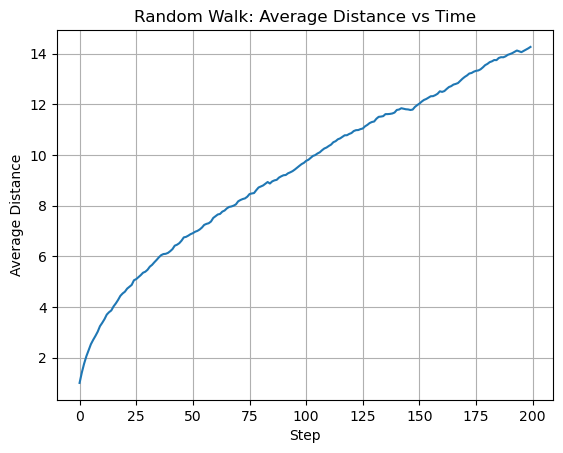

In [47]:
#Take 1000 walkers and let them walk for 200 steps --> extract +1 or -1 for 200 times for 1000 walkers
import numpy.random as npr
n_walk = 1000
n_steps = 200
walkers = 2 * npr.randint(0, 2, (n_walk,n_steps)) - 1 #you'll have zeros and twos and you subtract one
                                                    #Another (maybe more direct) way to do that would have been
                                                    #walkers = np.random.choice([-1, 1], size=(n_walk,n_steps), p=[0.5, 0.5])

distances = np.cumsum(walkers_2, axis=1) #Before doing it this way I made it with a loop that would give same result (see cell below)
print(distances)

#Take the square of the distances array
sq_dist = distances**2

#Compute the mean of the squared distances at each step 
means = np.mean(sq_dist, axis = 0)
print(means)

# Plot the average distances (sqrt(mean squared distance))
plt.plot(np.sqrt(means))
plt.xlabel("Step")
plt.ylabel("Average Distance")
plt.title("Random Walk: Average Distance vs Time")
plt.grid()
plt.show()

**ANSWER TO THE QUESTION**

The random walk's mean squared distance is expected to grow linearly with time, so the average distance $\sqrt{\text{distance}^2}$ should grow as $ t $. 
Basically $\text{distance}^2$ is the variance ('cause the average distance is zero, so the average of squared distance is the variance). It grows linearly with time, so its root grows as \sqrt{t}$, consistently with the the the theory of diffusion in random walks and the above graph. 

In [44]:
import numpy as np

# Parameters
n_walk = 1000
n_steps = 200

# Generate random walk steps
walkers = 2 * np.random.randint(0, 2, (n_walk, n_steps)) - 1

# Using np.cumsum
distances_cumsum = np.cumsum(walkers, axis=1)

# Using nested loops
distances_loops = np.zeros((n_walk, n_steps))
for i in range(n_walk):
    distances_loops[i, 0] = walkers[i, 0]  # Initialize the first step
    for j in range(1, n_steps):            # Start summing from the second step
        distances_loops[i, j] = distances_loops[i, j - 1] + walkers[i, j]

# Check if they are the same
print(np.allclose(distances_cumsum, distances_loops))  # Should print True


True


9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

Data shape: (21, 4)
First few rows of data:
 [[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]]


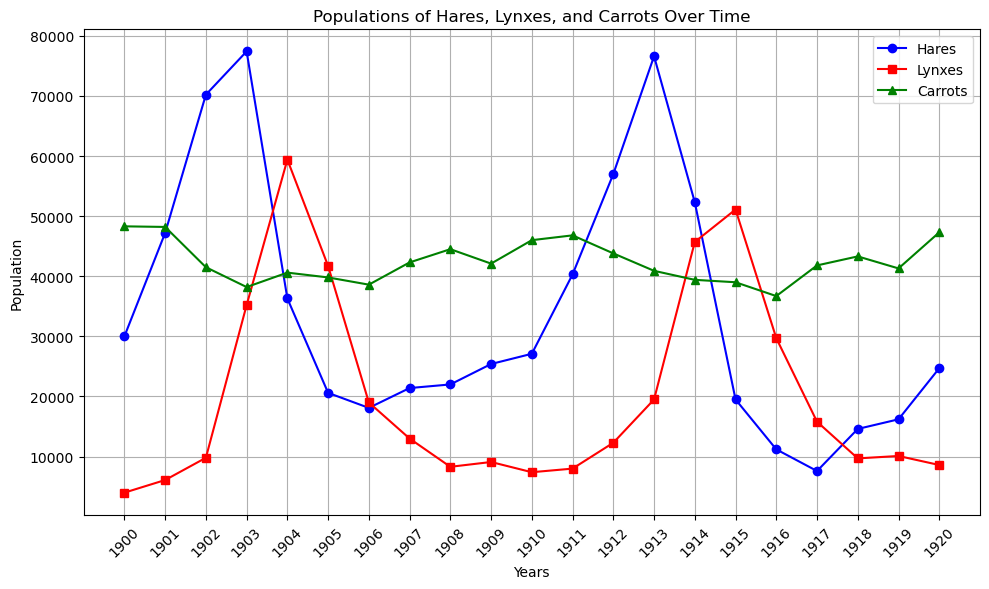


Mean populations:
Hares: 34080.95
Lynxes: 20166.67
Carrots: 42400.00

Standard deviation of populations:
Hares: 20897.91
Lynxes: 16254.59
Carrots: 3322.51

Correlations between species populations:
Correlation between Hares and Lynxes: 0.07
Correlation between Hares and Carrots: -0.02
Correlation between Lynxes and Carrots: -0.68

Species with the highest population each year:
Year 1900: carrots
Year 1901: carrots
Year 1902: hares
Year 1903: hares
Year 1904: lynxes
Year 1905: lynxes
Year 1906: carrots
Year 1907: carrots
Year 1908: carrots
Year 1909: carrots
Year 1910: carrots
Year 1911: carrots
Year 1912: hares
Year 1913: hares
Year 1914: hares
Year 1915: lynxes
Year 1916: carrots
Year 1917: carrots
Year 1918: carrots
Year 1919: carrots
Year 1920: carrots


In [60]:
#!curl -L -o populations.txt https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

#Load the data into a 2D array
data = np.loadtxt("populations.txt")

# Print the shape and a preview of the data
print("Data shape:", data.shape)
print("First few rows of data:\n", data[:5]) #data[:5] since not otherwise specified does that on rows 

#Create arrays out of the columns, the arrays being (in order): year, hares, lynxes, carrots
years = data[:,0]
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]

#Plot the 3 populations over the years
plt.figure(figsize=(10, 6))
plt.plot(years, hares, label='Hares', marker='o', linestyle='-', color='b')
plt.plot(years, lynxes, label='Lynxes', marker='s', linestyle='-', color='r')
plt.plot(years, carrots, label='Carrots', marker='^', linestyle='-', color='g')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Populations of Hares, Lynxes, and Carrots Over Time')

# Ensure years are shown as x-ticks
plt.xticks(years, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Compute statistical properties
mean_hares = np.mean(hares)
mean_lynxes = np.mean(lynxes)
mean_carrots = np.mean(carrots)

std_hares = np.std(hares)
std_lynxes = np.std(lynxes)
std_carrots = np.std(carrots)

correlation_hares_lynxes = np.corrcoef(hares, lynxes)[0, 1]
correlation_hares_carrots = np.corrcoef(hares, carrots)[0, 1]
correlation_lynxes_carrots = np.corrcoef(lynxes, carrots)[0, 1]

# Print statistical properties
print("\nMean populations:")
print(f"Hares: {mean_hares:.2f}")
print(f"Lynxes: {mean_lynxes:.2f}")
print(f"Carrots: {mean_carrots:.2f}")

print("\nStandard deviation of populations:")
print(f"Hares: {std_hares:.2f}")
print(f"Lynxes: {std_lynxes:.2f}")
print(f"Carrots: {std_carrots:.2f}")

print("\nCorrelations between species populations:")
print(f"Correlation between Hares and Lynxes: {correlation_hares_lynxes:.2f}")
print(f"Correlation between Hares and Carrots: {correlation_hares_carrots:.2f}")
print(f"Correlation between Lynxes and Carrots: {correlation_lynxes_carrots:.2f}")

# Determine which species has the highest population each year
highest_population_species = []

for i in range(len(years)):
    populations = [hares[i], lynxes[i], carrots[i]]
    species = ['hares', 'lynxes', 'carrots']
    highest_population_species.append(species[np.argmax(populations)])

# Print the species with the highest population each year
print("\nSpecies with the highest population each year:")
for year, species in zip(years, highest_population_species):
    print(f"Year {int(year)}: {species}")


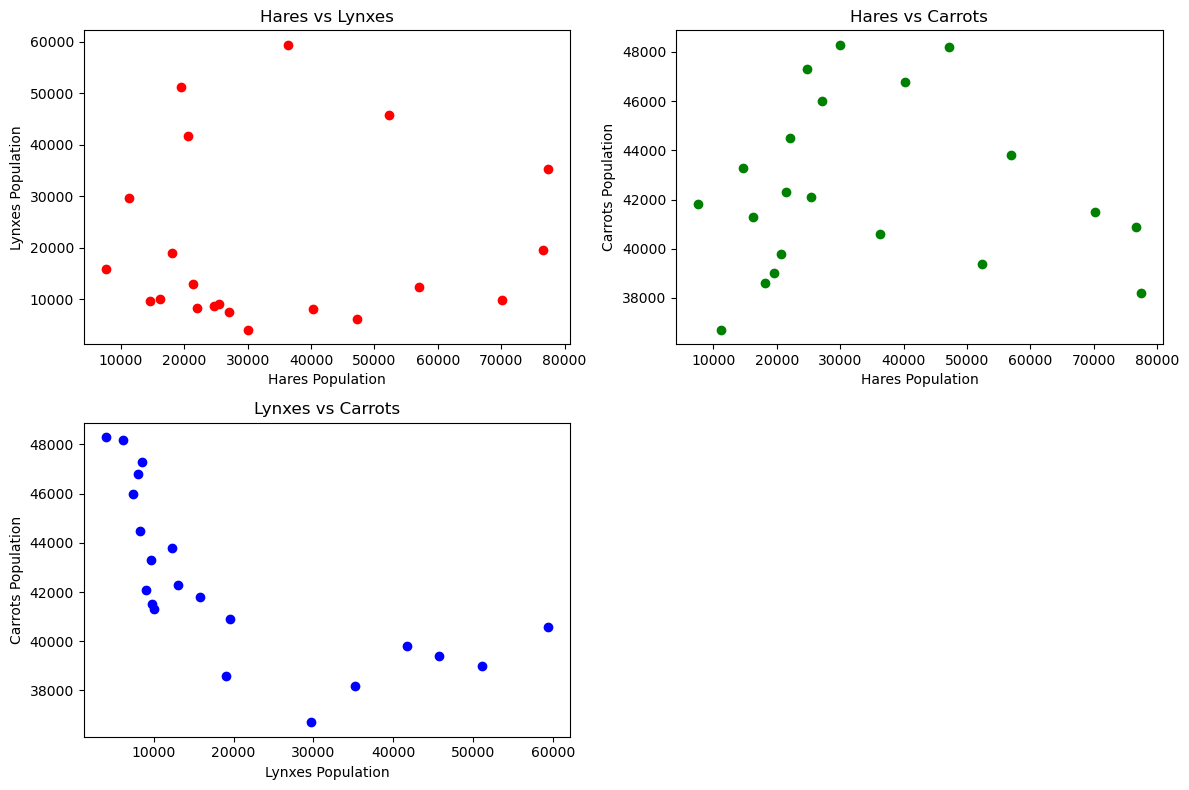

In [61]:
# Scatter plots to check for correlation between pairs of species
plt.figure(figsize=(12, 8))

# Scatter plot between Hares and Lynxes
plt.subplot(2, 2, 1)
plt.scatter(hares, lynxes, color='r')
plt.title('Hares vs Lynxes')
plt.xlabel('Hares Population')
plt.ylabel('Lynxes Population')

# Scatter plot between Hares and Carrots
plt.subplot(2, 2, 2)
plt.scatter(hares, carrots, color='g')
plt.title('Hares vs Carrots')
plt.xlabel('Hares Population')
plt.ylabel('Carrots Population')

# Scatter plot between Lynxes and Carrots
plt.subplot(2, 2, 3)
plt.scatter(lynxes, carrots, color='b')
plt.title('Lynxes vs Carrots')
plt.xlabel('Lynxes Population')
plt.ylabel('Carrots Population')

plt.tight_layout()
plt.show()